<h3 style="color:red;">Preterm neonate of 25 weeks of gestation and 0.72 kg with different sizes of persistent ductus arteriosus </h3>


In [80]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(False)
neo.metabolism(False)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 120 seconds
# neo.calculate(120)

# scale the model to a premature neonate of 25 weeks and 0.72 kg and recalculate 120 seconds
model._scaling.res_factor_circ_correction = 0.6
model._scaling.el_min_factor_correction = 1.0
model._scaling.el_max_factor_correction = 0.9
model._scaling.el_base_factor_circ_correction = 1.0

model._scaling.scale_patient(
    target_weight=0.720,
    target_height=0.32,
    target_blood_volume=0.080,
    target_hr_ref=170,
    target_map=35.0,
)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

# put patient on CPAP
neo.ventilator(True)
models["Ventilator"].set_ventilator_cpap(peep=6.0)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 6.8 sec. Average model step in 0.0284 ms.


<h5 style="color:red;">Model run results - No PDA</h5>

In [81]:
neo.validate()

Heart.heart_rate: max  149.28031 min  145.33748
AA.pres         : max   49.28625, min   27.28625 mmHg
LA_LV.flow      : net  226.31242, forward  226.31242, backward        0.0 ml/kg/min, stroke volume:    1.52913 ml/kg, 
RA_RV.flow      : net  226.67344, forward  226.67344, backward        0.0 ml/kg/min, stroke volume:    1.53156 ml/kg, 
SVC_RA.flow     : net  100.46156, forward  102.51483, backward   -2.05327 ml/kg/min, stroke volume:    0.67879 ml/kg, 
AAR_AD.flow     : net  124.90414, forward  127.03853, backward   -2.13439 ml/kg/min, stroke volume:    0.84394 ml/kg, 
LV.vol          : max    2.52302, min    0.82194 ml/kg


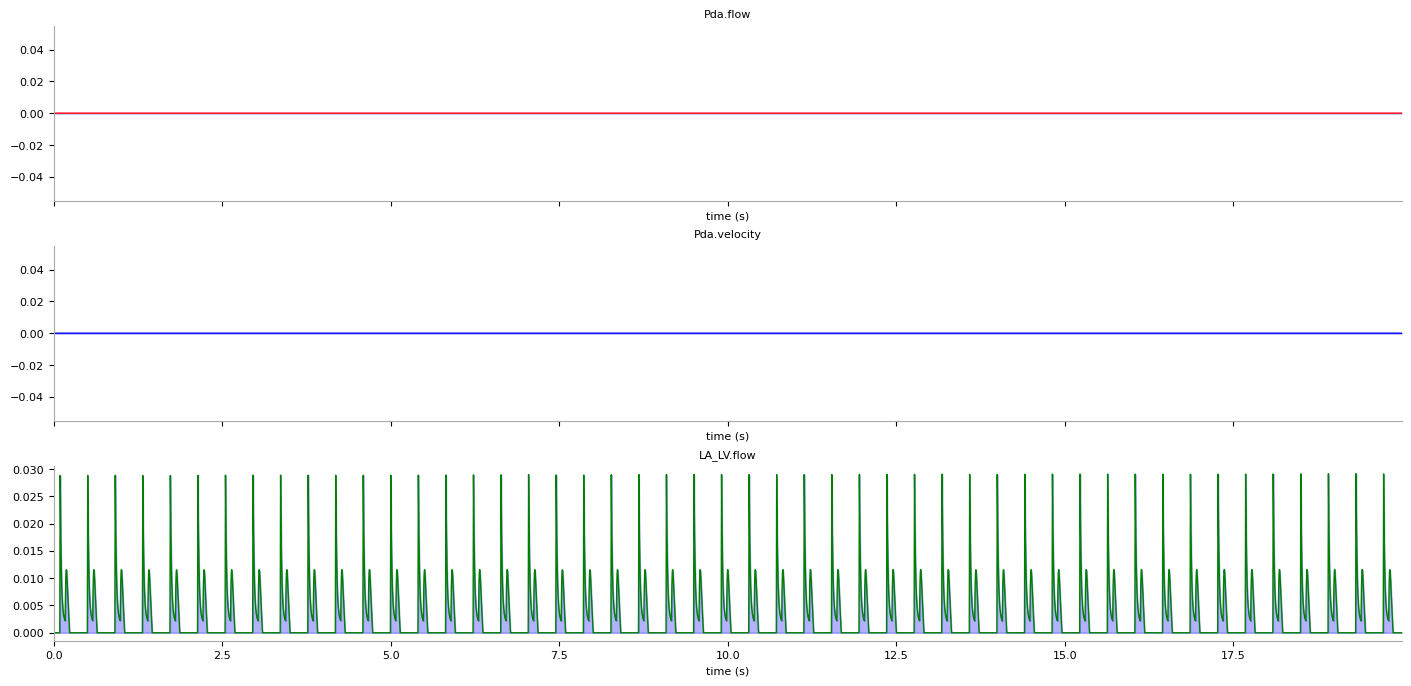

Pda.flow        : net        0.0, forward          0, backward          0 ml/kg/min
Pda.velocity    : max        0.0 min        0.0
LA_LV.flow      : net  227.68763, forward  227.68763, backward        0.0 ml/kg/min, stroke volume:    1.54886 ml/kg, 


In [82]:
neo.pda(True)
models["DA"].el_base = 35000.0
# models["AAR_DA"].r_for = 500.0
# models["AAR_DA"].r_back = 500.0
# models["Pda"].open_ductus(new_diameter=3.5, in_time=10.0)
# models["Pda"].close_ductus(in_time=10.0)
neo.plot_time_graph(
    ["Pda.flow", "Pda.velocity", "LA_LV.flow"],
    time_to_calculate=20,
    analyze=True,
    weight_based=True,
    sharey=False,
    combined=False,
    sampleinterval=0.0005,
)

In [70]:
neo.get_total_blood_volume()

Total blood volume: 79.99999999999818 ml/kg = 100.0%
Systemic blood volume: 73.44667498535335 ml/kg = 91.80834373169378%
Pulmonary total blood volume: 6.553325014644828 ml/kg = 8.19165626830622%
Pulmonary capillary blood volume: 2.6913280787794256 ml/kg = 41.06813064764938% of total pulmonary blood volume
Heart blood volume: 3.6825594167567717 ml/kg = 4.603199270946069%
Capillary blood volume: 3.662200226368552 ml/kg = 4.5777502829607934%
Venous blood volume: 55.916046359116116 ml/kg = 69.89505794889673%
Arterial blood volume: 10.131539293425963 ml/kg = 12.66442411678274%
Upper body blood volume: 19.052548587876988 ml/kg = 23.815685734846774%
Lower body blood volume: 50.65723729103364 ml/kg = 63.32154661379349%


0.05759999999999869

In [ ]:
neo.plot_time_graph(["LA_LV.flow"])

Broadhouse KM, Price AN, Durighel G, Cox DJ, Finnemore AE, Edwards AD, Hajnal JV, Groves AM. Assessment of PDA shunt and systemic blood flow in newborns using cardiac MRI. NMR Biomed. 2013 Sep;26(9):1135-41. doi: 10.1002/nbm.2927. Epub 2013 Feb 15. PMID: 23412748.

Bischoff AR, Giesinger RE, Stanford AH, Ashwath R, McNamara PJ. Assessment of superior vena cava flow and cardiac output in different patterns of patent ductus arteriosus shunt. Echocardiography. 2021 Sep;38(9):1524-1533. doi: 10.1111/echo.15163. Epub 2021 Jul 26. PMID: 34309068.

de Freitas Martins F, Ibarra Rios D, F Resende MH, Javed H, Weisz D, Jain A, de Andrade Lopes JM, McNamara PJ. Relationship of Patent Ductus Arteriosus Size to Echocardiographic Markers of Shunt Volume. J Pediatr. 2018 Nov;202:50-55.e3. doi: 10.1016/j.jpeds.2018.06.045. Epub 2018 Aug 13. PMID: 30115452.